In [1]:
# to use cd, etc
import sys
import os

import numpy as np
# for math work
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load

# needed for some matrix manipulations
import cvxpy as cp
# import math 

import scipy
# for curve fitting
from scipy import optimize
from scipy.io import loadmat  # this is the SciPy module that loads mat-files

from sklearn.metrics import r2_score, mean_squared_error

# import mat73
import pandas as pd

import matplotlib.pyplot as plt
# for plots
import seaborn
# set up seaborn for the plots
seaborn.set()

# suppress deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# # # to save data plots
# from matplotlib.backends.backend_pdf import PdfPages

# from datetime import datetime
import pickle

In [2]:
sessStart = '072312'
sessEnd = '080412'
savepath = '/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/data/' + 'jeev' + sessStart + '_' + sessEnd + '/'

In [3]:
with open(savepath + "cursorData.pkl", 'rb') as infile:
     kinList = pickle.load(infile)
kinData = np.asarray(kinList)[0]

In [4]:
with open(savepath + "decoder_2_neuralData.pkl", 'rb') as infile:
     decNum, usedUnits, succIdx, nData_succ = pickle.load(infile)

In [7]:
nB = nData_succ.shape[0]
nN = nData_succ.shape[1]
nT = nData_succ.shape[2]

In [8]:
usedUnits

array([ 50,  85, 105, 140, 215, 225, 270, 300, 395, 440, 520, 545, 590,
       595, 610, 635])

In [9]:
decNum

2

In [10]:
succIdx

array([  41,   42,   43, ..., 2093, 2094, 2095])

In [11]:
kinSucc = kinData[succIdx]

In [12]:
len(kinData[0])

73

In [78]:
trLen = 20

kinLen = np.zeros(len(kinSucc))
overcount = 0
for iK in range(len(kinSucc)):
    kinLen[iK] = len(kinSucc[iK])    
    if (len(kinSucc[iK]) >= trLen):
        overcount = overcount + 1

In [79]:
overcount

497

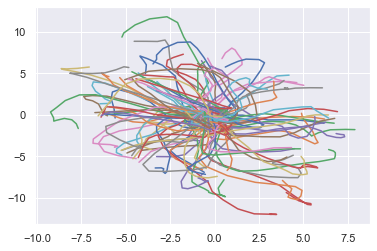

In [80]:
for iK in range(100):
    plt.plot(kinSucc[iK][:trLen, 0], kinSucc[iK][:trLen, 1]);
plt.show()

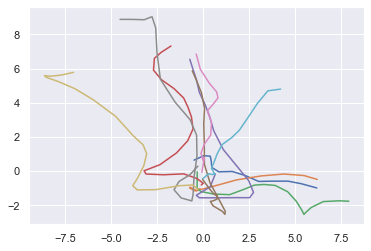

In [86]:
for iK in range(10):
    plt.plot(kinSucc[iK][:trLen, 0], kinSucc[iK][:trLen, 1]);
plt.show()

In [19]:
(kinSucc[0]).flatten()

array([-0.50696394,  0.64126881,  0.33965621,  2.80887867,  0.02989083,
        0.90377537,  0.05624778,  1.60818402,  0.37313794,  0.87116286,
       -1.552353  ,  0.46456583,  0.42112174,  0.61061842, -1.82858976,
       -0.1260992 ,  0.45845717,  0.21290202,  1.31038631,  1.26195605,
        0.83567308, -0.0426576 ,  4.44126564,  2.92224253,  1.56887367,
       -0.02180541,  4.65626314,  2.15265908,  2.26633179, -0.25735946,
        3.09664259,  1.94579971,  3.00133009, -0.60581404,  6.19419482,
        4.02082972,  3.70442059, -0.59105557,  3.85393287,  2.77484159,
        4.5961901 , -0.5893928 ,  8.11178371,  1.94594334,  5.31184821,
       -0.73818833,  8.13550567,  2.33025659,  6.1610273 , -0.98743926,
        5.11303623, -0.34323602])

In [20]:
#rescale to mean 0
def standardizeArray(array_in):
    return (array_in - np.mean(array_in))/ (np.max(array_in) - np.min(array_in))

In [87]:
k_flat = []
nd_flat = []
tr = []
for iK in range(len(kinSucc)):
    if (len(kinSucc[iK]) >= trLen):
        tr.append(iK)
        # make the cursor matrix
        k_iter = kinSucc[iK][0:trLen, :]
        k_flat.append(k_iter.flatten())
        
        # make the neural activity matrix
        k0 = kinSucc[iK][0, :]
        nd_tr = nData_succ[0:trLen, :, iK].flatten()
#         np.concatenate((k0, nd_tr))
        nd_flat.append(np.concatenate((k0, nd_tr)))
        
        
k_flat = np.array(k_flat, dtype=float).T
nd_flat = np.array(nd_flat, dtype=float).T

In [102]:
k_flat.shape

(80, 497)

In [100]:
nd_flat.shape

(308, 497)

In [101]:
dec_calc = k_flat@np.linalg.pinv(nd_flat)
dec_calc.shape

(80, 308)

In [91]:
np.linalg.pinv(nd_flat).shape

(497, 308)

In [92]:
def plot_r2(xdata, ydata):
    plt.scatter(xdata, ydata)
    slope, intercept, r, p, se = scipy.stats.linregress(np.ndarray.flatten(xdata), np.ndarray.flatten(ydata))
    
    plt.plot(np.linspace(min(np.sort(np.ndarray.flatten(xdata))),max(np.sort(np.ndarray.flatten(xdata))),10),np.linspace(min(np.sort(np.ndarray.flatten(xdata))),max(np.sort(np.ndarray.flatten(xdata))),10)*slope+ intercept,'r')
#     plt.xlabel("cursor " + str(label))
#     plt.ylabel("prediction: cursor " + str(label))
    plt.title("r-squared = " + str(r))
    plt.show()

In [93]:
kin_calc = np.zeros((k_flat.shape[0] , len(tr)))
for iT_idx, iT_val in enumerate(tr):
    kin_calc[:, iT_idx] = dec_calc@nd_flat[:, iT_idx]

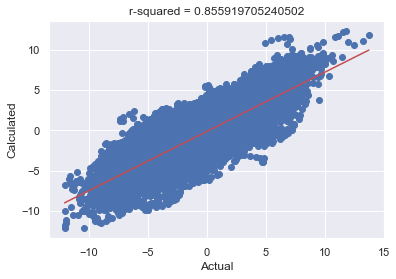

In [98]:
plt.xlabel("Actual")
plt.ylabel("Calculated")
plot_r2(k_flat.flatten(),kin_calc.flatten())

In [44]:
dec_calc.shape

(80, 304)

In [45]:
nd_flat[:,0].shape

(304,)